# Example 10.5: Rankine with Reheat and OFH Regeneration

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A superheat steam power plant with reheat has a turbine inlet at $3\ \mathrm{MPa}$ and $550^\circ\mathrm{C}$.  After expansion to $400\ \mathrm{kPa}$, a fraction of the steam is extracted and used in a regeneration process with an Open Feedwater Heater (OFH) where the exit of the OFH is saturated liquid at $400\ \mathrm{kPa}$.  The remaining steam is reheated to $550^\circ\mathrm{C}$ and then expanded to $15\ \mathrm{kPa}$.  For isentropic efficiencies of $\eta_t=0.8$ and $\eta_p=0.6$ find:
* (a) Specific net work (kJ/kg)
* (c) Thermal efficiency of the cycle
* (d) Sketch a $T$-$s$ diagram of the cycle

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2140132&node=7988530&a=781891447&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI_C import *

water = realfluid.Properties('Water')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[5] = Quantity(550.0,'degC') # Turbine inlet temperature
p[5] = Quantity(3.0,'MPa')    # Turbine inlet pressure
p[6] = Quantity(400.0,'kPa')  # Pressure after first expansion
T[7] = Quantity(550.0,'degC') # Reheat temperature
p[8] = Quantity(15.0,'kPa')   # Pressure after second expansion
eta_t = Quantity(0.8,'')      # Turbine isentropic efficiency
eta_p = Quantity(0.6,'')      # Pump isentropic efficiency

Summary();

<IPython.core.display.Latex object>

,T,p
unit,°C,kPa
5,550.0,3000.0
6,-,400.0
7,550.0,-
8,-,15.0


### Assumptions
- Non-ideal work devices
- Superheat in boiler: superheated vapor at boiler exit
- Single phase into pump: saturated liquid at condenser exit
- Isobaric heat exchagners
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
x[1] = 0            # Single phase into pump
x[3] = 0            # Single phase into pump
p[1] = p[8]         # isobaric heat exchanger
p[2] = p[3] = p[6]  # isobaric heat exchanger
p[7] = p[6]         # isobaric heat exchanger
p[4] = p[5]         # isobaric heat exchanger

Summary();

<IPython.core.display.Latex object>

,T,p,x
unit,°C,kPa,
1,-,15.0,0.0
2,-,400.0,-
3,-,400.0,0.0
4,-,3000.0,-
5,550.0,3000.0,-
6,-,400.0,-
7,550.0,400.0,-
8,-,15.0,-


#### (a) Specific net work

In [4]:
%%showcalc
#### State 1)
states.fix(1,water)

#### 1-2) Non-ideal compression
# Isentropic compression
p['2s'] = p[2]
s['2s'] = s[1]
states.fix('2s',water)

# Actual compression
h[2] = h[1] + (h['2s']-h[1])/eta_p
states.fix(2,water)

#### State 3) 
states.fix(3,water)

#### 3-4) Non-ideal compression
# Isentropic compression
p['4s'] = p[4]
s['4s'] = s[3]
states.fix('4s',water)

# Actual compression
h[4] = h[3] + (h['4s']-h[3])/eta_p
states.fix(4,water)

#### 4-5) Isobaric heat addition
states.fix(5,water)

#### 5-6) Non-ideal expansion
# Isentropic Expansion
p['6s'] = p[6]
s['6s'] = s[5]
states.fix('6s',water)

# Actual expansion
h[6] = h[5] - eta_t*(h[5]-h['6s'])
states.fix(6,water)

#### 6-7) Isobaric heat addition
states.fix(7,water)

#### 7-8) Non-ideal expansion
# Isentropic Expansion
p['8s'] = p[8]
s['8s'] = s[7]
states.fix('8s',water)

# Actual expansion
h[8] = h[7] - eta_t*(h[7]-h['8s'])
states.fix(8,water)

#### Mass bleed-off fraction
y = (h[3]-h[2])/(h[6]-h[2])

#### Work 
w_1_to_2 = (1-y)*(h[1]-h[2])
w_3_to_4 = h[3]-h[4]
w_5_to_6 = h[5]-h[6]
w_7_to_8 = (1-y)*(h[7]-h[8])
w_net = w_1_to_2 + w_3_to_4 + w_5_to_6 + w_7_to_8

### State 1)

### 1-2) Non-ideal compression

 Isentropic compression

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Actual compression

<IPython.core.display.Latex object>

### State 3) 

### 3-4) Non-ideal compression

 Isentropic compression

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Actual compression

<IPython.core.display.Latex object>

### 4-5) Isobaric heat addition

### 5-6) Non-ideal expansion

 Isentropic Expansion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Actual expansion

<IPython.core.display.Latex object>

### 6-7) Isobaric heat addition

### 7-8) Non-ideal expansion

 Isentropic Expansion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Actual expansion

<IPython.core.display.Latex object>

### Mass bleed-off fraction

<IPython.core.display.Latex object>

### Work 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
states.display();

,T,p,v,u,h,s,x,phase
unit,°C,kPa,m³/kg,kJ/kg,kJ/kg,kJ/K/kg,,
1,53.969313,15.0,0.001014,225.929071,225.944282,0.754865,0,twophase
2,54.046337,400.0,0.001014,226.189343,226.594906,0.755660,N/A,liquid
2s,53.984105,400.0,0.001014,225.929105,226.334657,0.754865,N/A,liquid
3,143.608359,400.0,0.001084,604.221134,604.654555,1.776455,0,twophase
4,144.316269,3000.0,0.001083,606.099043,609.346935,1.780954,N/A,liquid
4s,143.878166,3000.0,0.001082,604.223489,607.469983,1.776455,N/A,liquid
5,550.000000,3000.0,0.124368,3196.597544,3569.702948,7.376848,N/A,supercritical_gas
6,308.262535,400.0,0.664687,2818.171292,3084.046040,7.597079,N/A,gas
6s,249.104089,400.0,0.594118,2724.984690,2962.631813,7.376848,N/A,gas


#### (b) Thermal efficiency

In [6]:
%%showcalc
#### Boiler First Law
q_in = h[5]-h[4] + (1-y)*(h[7]-h[6])

#### Thermal efficiency
eta_th = w_net/q_in
eta_th.ito('')

### Boiler First Law

<IPython.core.display.Latex object>

### Thermal efficiency

<IPython.core.display.Latex object>

#### (d) Diagrams

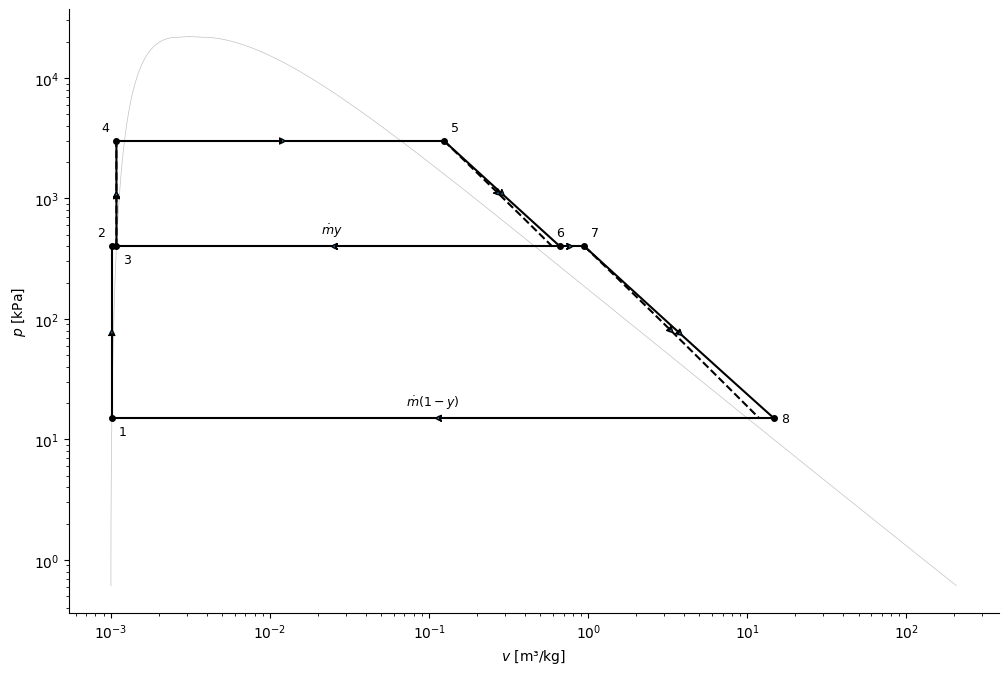

In [7]:
pv = water.pv_diagram()
pv.ax.set_yscale("log")

pv.plot_state(states[1],label_loc='south east')
pv.plot_state(states[2],label_loc='north west')
pv.plot_state(states[3],label_loc='south east')
pv.plot_state(states[4],label_loc='north west')
pv.plot_state(states[5],label_loc='north east')
pv.plot_state(states[6],label_loc='north')
pv.plot_state(states[7],label_loc='north east')
pv.plot_state(states[8],label_loc='east')
    
pv.plot_process(states[1],states[2],path='nonideal')
pv.plot_process(states[2],states[3],path='isobaric',arrow=False)
pv.plot_process(states[3],states[4],path='nonideal')
pv.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed')
pv.plot_process(states[4],states[5],path='isobaric')
pv.plot_process(states[5],states[6],path='nonideal')
pv.plot_process(states[5],states['6s'],path='isentropic',linestyle='dashed')
pv.plot_process(states[6],states[7],path='isobaric')
pv.plot_process(states[7],states[8],path='nonideal')
pv.plot_process(states[7],states['8s'],path='isentropic',linestyle='dashed')
pv.plot_process(states[6],states[3],path='isobaric',label='$\dot{m}y$')
pv.plot_process(states[8],states[1],path='isobaric',label='$\dot{m}(1-y)$');

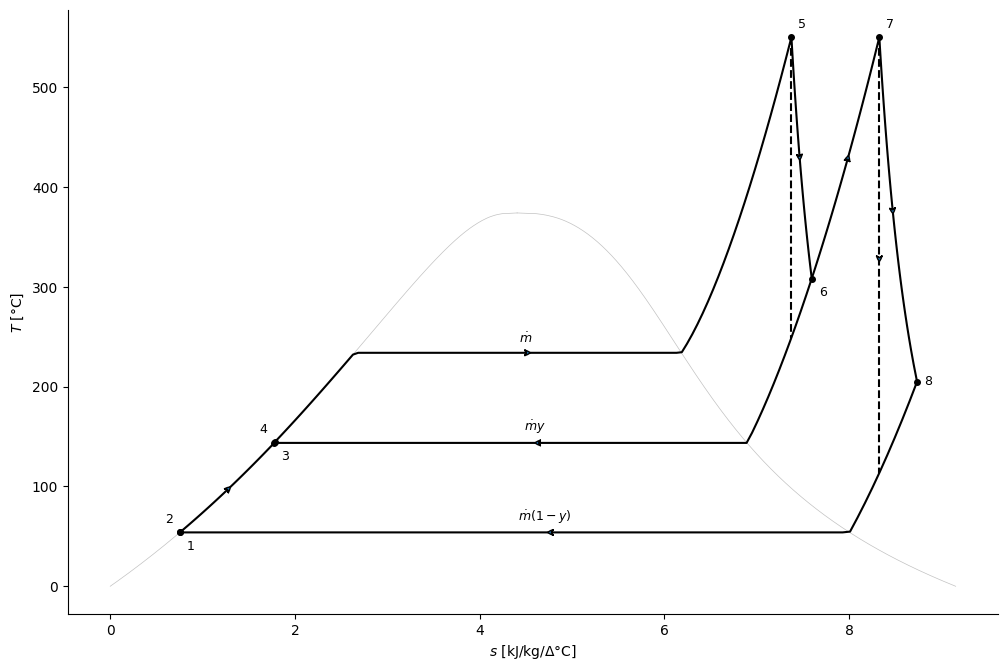

In [8]:
Ts = water.Ts_diagram()

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north west')
Ts.plot_state(states[3],label_loc='south east')
Ts.plot_state(states[4],label_loc='north west')
Ts.plot_state(states[5],label_loc='north east')
Ts.plot_state(states[6],label_loc='south east')
Ts.plot_state(states[7],label_loc='north east')
Ts.plot_state(states[8],label_loc='east')
    
Ts.plot_process(states[1],states[2],path='nonideal',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric')
Ts.plot_process(states[3],states[4],path='nonideal',arrow=False)
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[4],states[5],path='isobaric',label='$\dot{m}$',xcoor=4.5)
Ts.plot_process(states[5],states[6],path='nonideal')
Ts.plot_process(states[5],states['6s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[6],states[7],path='isobaric')
Ts.plot_process(states[7],states[8],path='nonideal')
Ts.plot_process(states[7],states['8s'],path='isentropic',linestyle='dashed')
Ts.plot_process(states[6],states[3],path='isobaric',label='$\dot{m}y$')
Ts.plot_process(states[8],states[1],path='isobaric',label='$\dot{m}(1-y)$');